# IRIS DATASET
- Classify dataset with numerical values only

In [61]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

In [44]:
# read the dataset
df = pd.read_csv('Data/iris.csv')
column_names = df.columns
df.head(1)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa


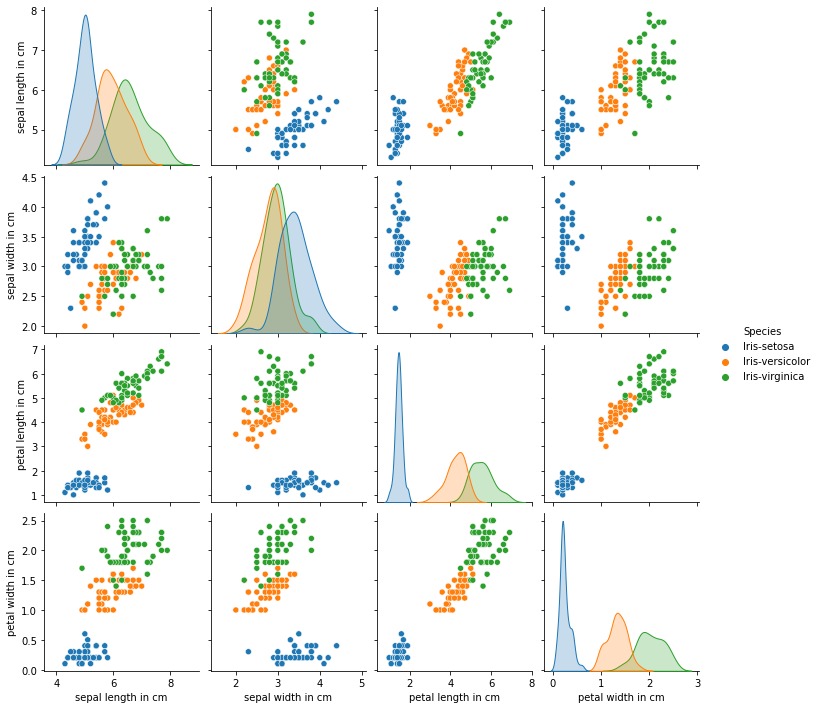

In [45]:
sns.pairplot(df, hue='Species')

In [46]:
#label encode the target variable
encode = LabelEncoder()
df['Species'] = encode.fit_transform(df['Species'])
df.head(1)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,Species
0,5.1,3.5,1.4,0.2,0


In [63]:
# train-test-split
X = df.drop(columns=['Species'], axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=0)

In [67]:
# Simple classification
model = LogisticRegression()
model.fit(X_train,y_train)
predict = model.predict(X_test)
print(accuracy_score(y_test,predict))

0.9333333333333333


/home/reine/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [68]:
# pipeline
pipe = make_pipeline(
    StandardScaler(), # scale numerical data
    LogisticRegression() # classifier
    )

In [69]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [71]:
predict = pipe.predict(X_test)
pipe.score(X_test, y_test)

0.92